<a href="https://colab.research.google.com/github/sudhakarmlal/S13/blob/master/yolo_OPENCV_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment S13: OpenCV Yolo

 In this assignment we have used OpenCV Yolo to deletect Person object with Laptop and Cycle that is available in Coco dataset

## Mount google dmount and copy Yoobov3 weights configs and images

In [0]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp  '/content/drive/My Drive/eva4/yolov3.cfg' .
!cp  '/content/drive/My Drive/eva4/yolov3.weights' .
!cp  '/content/drive/My Drive/eva4/monimoy_at_work.jpg' .
!cp  '/content/drive/My Drive/eva4/sudhakar_cycling_new.jpg' .
!cp  '/content/drive/My Drive/eva4/coco.names' .

## Import Libraries

In [0]:
import cv2
import numpy as np

## Load Yolo
Load Yolo which takes three arguments

Weight file: it’s the trained model, the core of the algorythm to detect the objects.
Cfg file: it’s the configuration file, where there are all the settings of the algorythm.
 Name files: contains the name of the objects that the algorythm can detect.


In [0]:
# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

## Loading Images
Loaing images to perform object detection

In [0]:
# Loading image

img_list = []
img_shape_list = []
for img_file in ["monimoy_at_work.jpg", "sudhakar_cycling_new.jpg" ]:
    img = cv2.imread(img_file)
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    img_list.append(img)
    img_shape_list.append(img.shape)


## Method to detect object
We first need it to convert convert images to blob. Blob it’s used to extract feature from the image and to resize them. YOLO accepts three sizes:

    320×320 it’s small so less accuracy but better speed
    609×609 it’s bigger so high accuracy and slow speed
    416×416 it’s in the middle and you get a bit of both.

We are using size: 416×416

The method get_outs returns outs which is an array that conains all the informations about objects detected, their position and the confidence about the detection.

In [0]:
# Detecting objects
def get_outs(img):
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)
    return outs

# Display information
- Loop trough the outs array, we calculate the confidence and we choose a confidence threshold. Confidence is chosen as 0.5
- The following  informations are extracted.
    Box: contain the coordinates of the rectangle sorrounding the object detected.
    Label: it is the name of the object detected
    Confidence: the confidence about the detection from 0 to 1.

In [0]:
# Showing informations on the screen
for i, img in enumerate(img_list):
    class_ids = []
    confidences = []
    boxes = []
    outs = get_outs(img)
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * img_shape_list[i][1])
                center_y = int(detection[1] * img_shape_list[i][0])
                w = int(detection[2] * img_shape_list[i][1])
                h = int(detection[3] * img_shape_list[i][0])

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    print(indexes)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[i]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y + 30), font, 3, color, 3)


#cv2.imshow("Image", img)

[[2]
 [3]
 [0]
 [6]
 [5]
 [7]]
[[0]
 [1]]


# Display Processed Images

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(img_list[0])

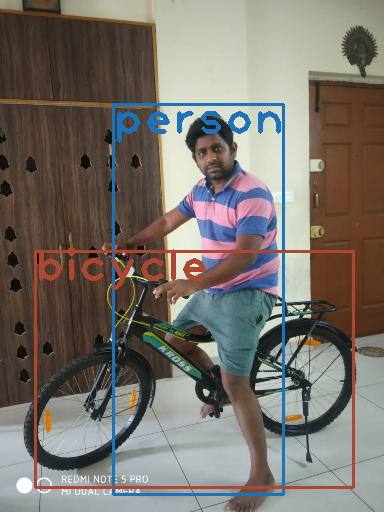

In [0]:
cv2_imshow(img_list[1])